Real estate price prediction Data: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

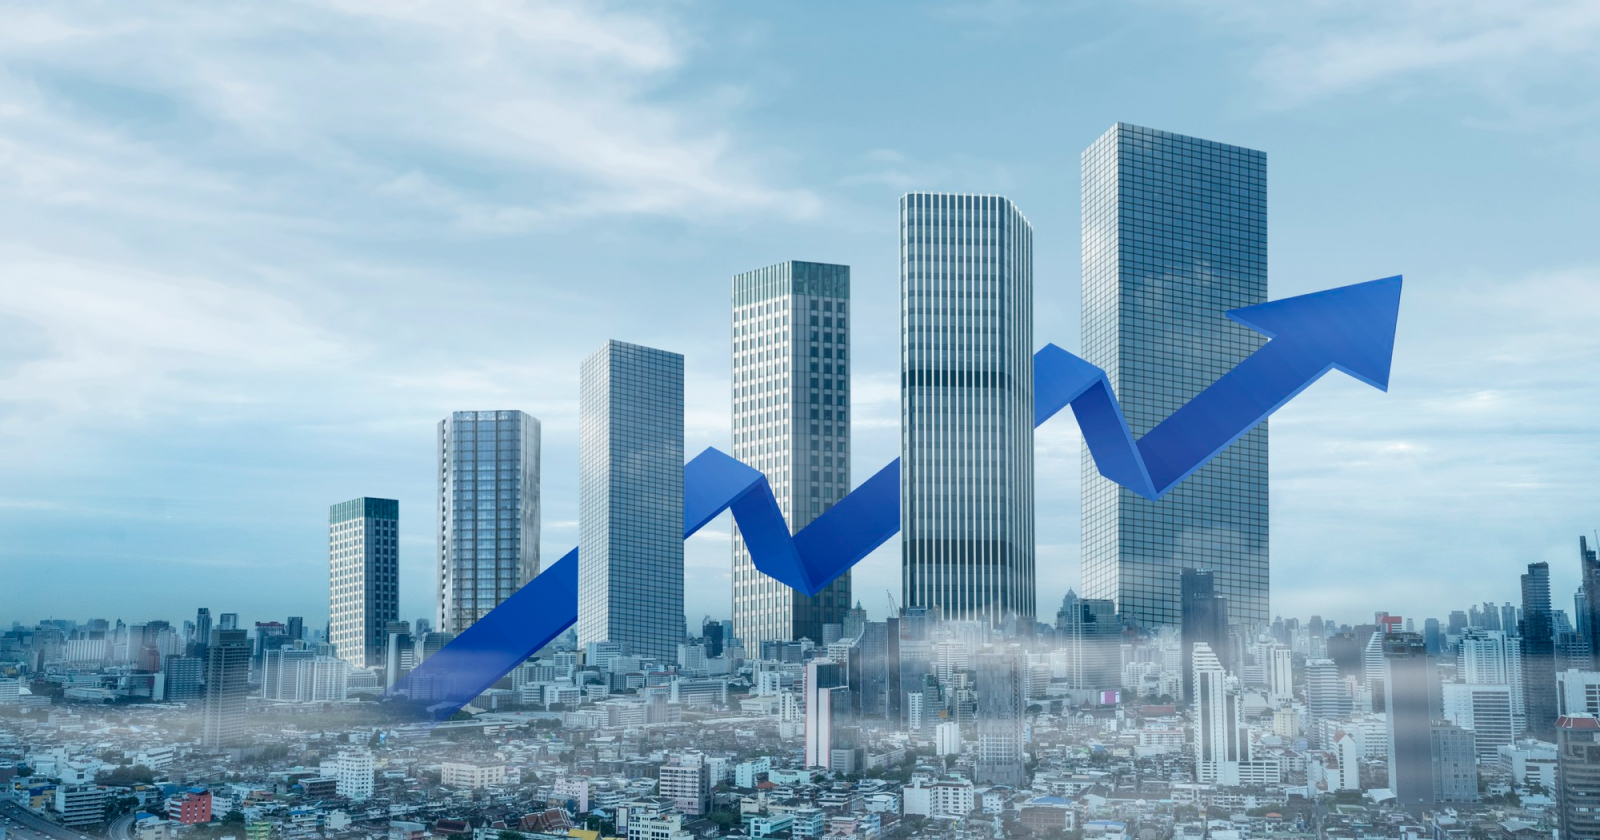

# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# EDA

In [3]:
df=pd.read_csv('Real estate.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.isna().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


In [5]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [7]:
df=df.sort_values(by='X1 transaction date',ascending=True)

In [8]:
df.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
52,53,2013.583,32.1,1438.5790,3,24.97419,121.51750,27.0
44,45,2013.583,2.7,533.4762,4,24.97445,121.54765,53.9
391,392,2013.583,6.2,1939.7490,1,24.95155,121.55387,31.3
47,48,2013.583,35.9,640.7391,3,24.97563,121.53715,61.5
2,3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [10]:
df=df.drop('No',axis=1)

# Define Features & Target

In [11]:
#Features
x=df[['X1 transaction date',
          'X2 house age',
          'X3 distance to the nearest MRT station',
          'X4 number of convenience stores',
          'X5 latitude',
          'X6 longitude']]
#Target
y=df['Y house price of unit area']

# Training Data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
y_test

,Y house price of unit area
388,27.3
210,52.2
154,20.7
288,51.0
131,30.7
...,...
281,44.8
276,34.0
149,39.7
252,52.7


In [13]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Predict

In [14]:
y_pred=model.predict(x_test)
y_pred

array([34.09895699, 50.08156383, 15.41036308, 48.05106424, 36.40228361,
       34.5682606 , 46.3322144 , 13.80130649, 10.56506406, 40.80051025,
       41.87257579, 28.78342596, 44.24018156, 40.12360762, -1.76656058,
       54.45484752, 12.36095675, 45.40284167, 50.88653155, 24.20140618,
       44.06021593, 42.83555596, 47.94216494, 34.78327167, 10.94268918,
       15.77489206, 42.0862087 , 43.02463561, 24.55769284, 36.32612689,
       26.66161914, 51.05961681, 45.53450965, 41.30333955, 44.89251745,
       33.89366116, 46.53700614, 34.20828312, 39.48176496, 26.62002982,
       50.56200975,  5.96882663, 50.59257604, 49.64972519, 47.00345218,
       47.64881784, 53.30362775, 35.08870274, 34.04768409, 43.8091274 ,
       40.90390297, 48.3847584 , 29.02050224, 35.38095587, 34.85370526,
       41.24820345, 45.45044528, 33.94426883, 34.14069098, 11.58057956,
       37.61986668, 48.94827625, 44.13520542, 46.23300133, 45.35498516,
       47.26984763, 48.94827625, 38.79280074, 49.75032916, 42.46

# Evaluate Model

In [15]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("r2:",r2)
print("MSE;",mse)

r2: 0.6340868616019008
MSE; 67.74615747371108


In [16]:
coefficients=pd.DataFrame({
    "Feature": x.columns,
    'Coefficient': model.coef_,
},columns=['Coefficient'])
coefficients

,Coefficient
0,4.391915
1,-0.305663
2,-0.005293
3,0.946664
4,212.234780
5,-21.002709


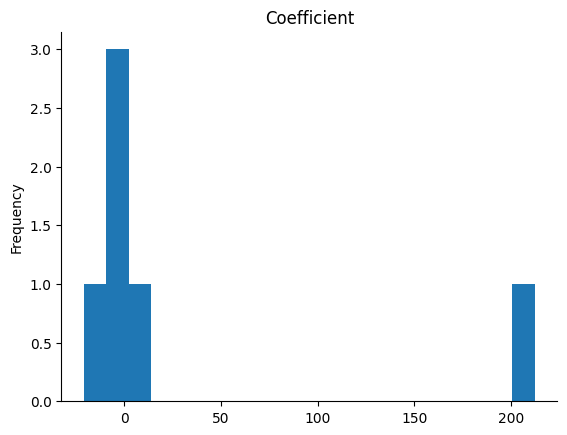

In [17]:
coefficients['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Visualization

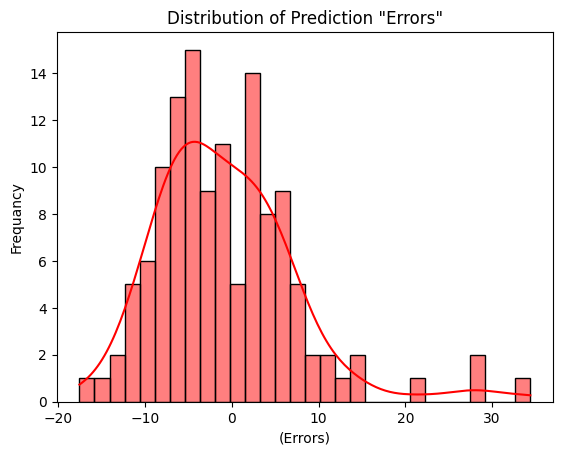

In [18]:
sns.histplot(y_test-y_pred, bins=30, kde= True, color = 'red')
plt.xlabel('(Errors)')
plt.ylabel('Frequancy')
plt.title('Distribution of Prediction "Errors"')
plt.show()


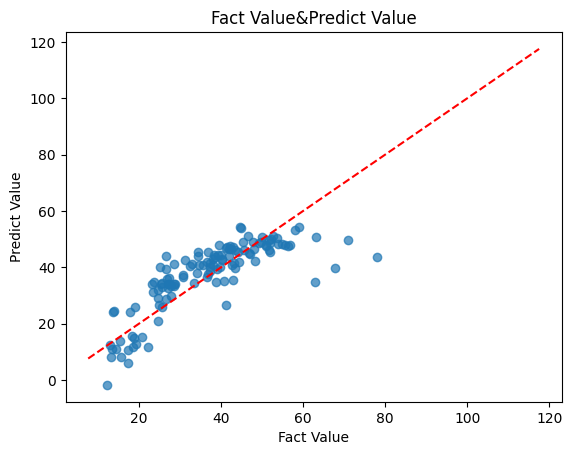

In [24]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Fact Value")
plt.ylabel("Predict Value")
plt.title("Fact Value&Predict Value")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # خط مثالي
plt.show()

In [20]:
new_house =pd.DataFrame([[2014, 12, 250, 4, 123, 20]], columns=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude'])
model.predict(new_house)


array([22986.04965466])

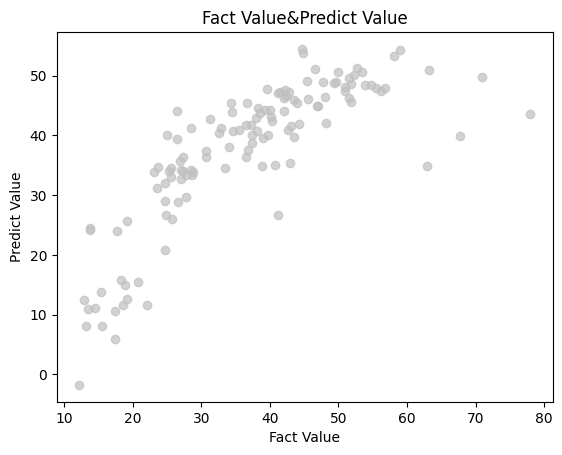

In [23]:
plt.scatter(y_test, y_pred, color ='silver', alpha = 0.7)
plt.xlabel("Fact Value")
plt.ylabel("Predict Value")
plt.title("Fact Value&Predict Value")
plt.show()